# **Sparks Foundation Internship - (Data Science and Buisness Analytics)**

## **Name - Sayali Pandurang Kokitkar**

## Task 2 - Prediction Using Unsupervised Learning

To predict the optimum number of clusters ➡

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## loading the Dataset

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Sparks/Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df1=df.drop(df.columns[0],axis=1)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

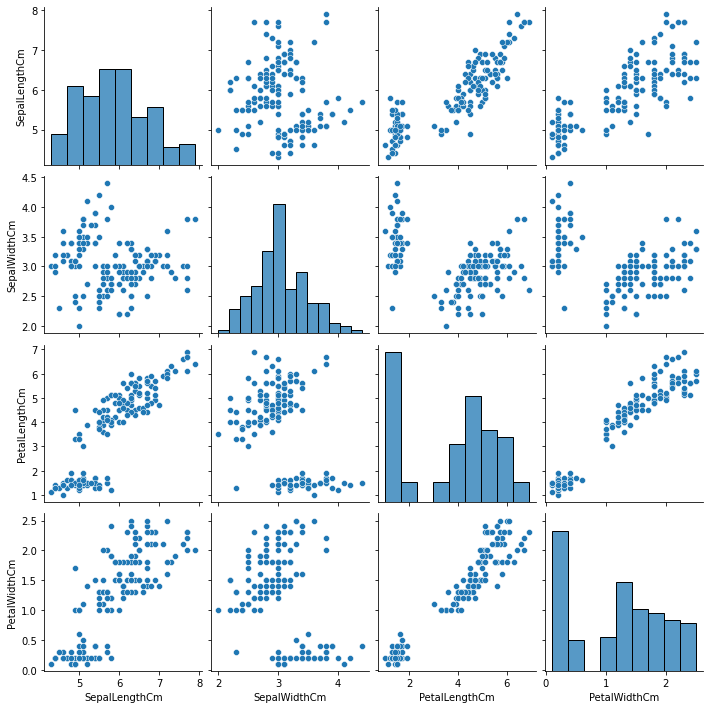

In [8]:
sns.pairplot(df1)

## Model Building -

### Finding the optimum number of clusters for K means classifications.  

In [9]:
x = df1.iloc[:,[0,1,2,3]].values

In [10]:
wcss = []     ## Within cluster sum of square

for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init="k-means++" , random_state = 0 , max_iter=300,n_init=10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


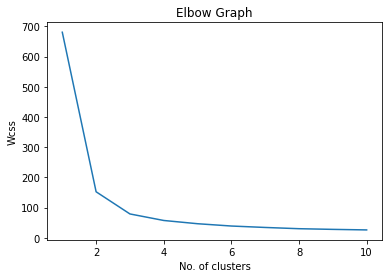

In [11]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Graph")
plt.xlabel("No. of clusters")
plt.ylabel("Wcss")
plt.show()

### *>> Optimum number of clusters (k) = 3*

## Applying kmeans to the dataset using optimum no of clusters(k=3)

In [12]:
kmeans2 = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=0)

y_predict = kmeans2.fit_predict(x)

### >> *Visualising the clusters*

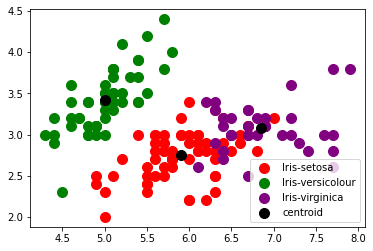

In [19]:
#Plotting the Clusters
plt.scatter(x[y_predict == 0,0],x[y_predict == 0,1],s=100,c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_predict == 1,0],x[y_predict == 1,1],s=100,c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_predict == 2,0],x[y_predict == 2,1],s=100,c = 'purple', label = 'Iris-virginica')

#Plotting the centroids of clusters
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],s=100,c="black",label="centroid")

plt.legend()
plt.show()

In [15]:
print("Task 2 Completed")

Task 2 Completed
